# Exercise 1
A well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease. A young UniPD startUp has developed an innovative technique of screening. During the qualification phase, a random sample of n = 75 patients known to have the disease is screened using the new method.

(a) Write the probability mass function of getting a false negative y, using the new technique.

In [1]:
pmf <- function(y, n, p) {
    return(dbinom(y, n, p))
}

(b) Let n = 75 be the patient sample, the new method fails to detect the disease in y = 6 cases.\
What is the frequentist estimator for the failure probability of the new method?

In [2]:
n <- 75
y <- 6
p_frequentist <- y / n
cat("Frequentist estimator for failure probability:", p_frequentist)

Frequentist estimator for failure probability: 0.08

(c) In Bayesian setting, evaluate the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14.\
Plot the posterior distribution for y, and mark on the plot the mean value and variance.

Posterior variance: 0.0009520625

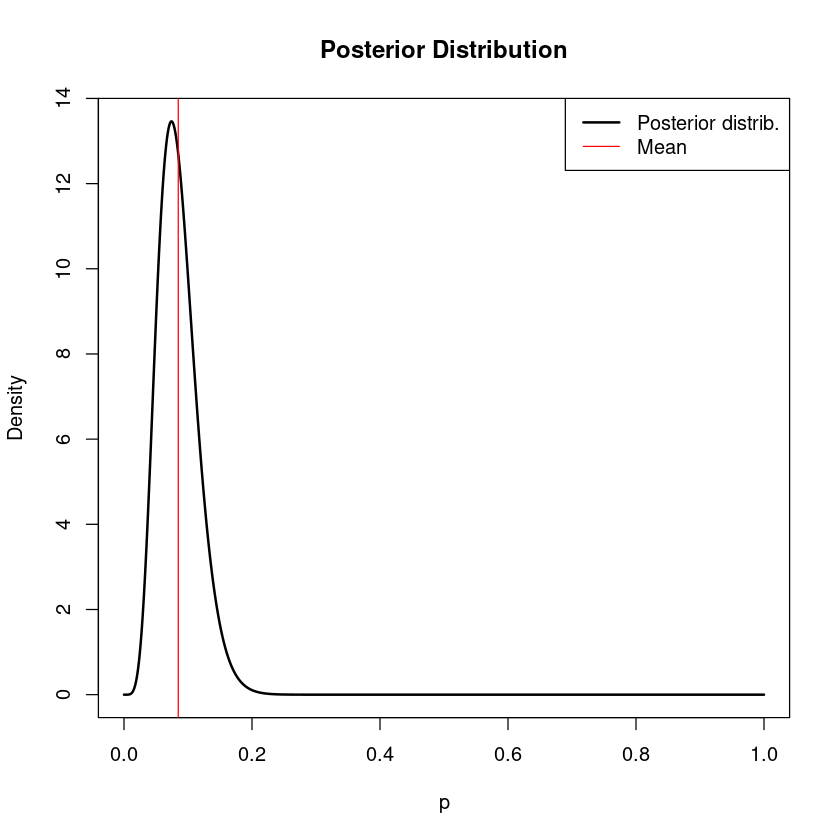

In [3]:
mean <- 0.15
sd <- 0.14
p <- seq(0, 1, length.out = 1000)

# prior
k <- mean * (1 - mean) / sd^2 - 1
alpha_prior <- mean * k
beta_prior <- (1 - mean) * k
prior <- dbeta(p, alpha_prior, beta_prior)

# posterior
alpha_post <- alpha_prior + y
beta_post <- beta_prior + (n - y)
posterior <- dbeta(p, alpha_post, beta_post)
mean_post <- alpha_post / (alpha_post + beta_post)

plot(p, posterior, type = "l", lwd = 2,
     main = "Posterior Distribution",
     xlab = "p", ylab = "Density")
abline(v = mean_post, col = "red")
legend("topright", lwd = c(2, 1),
       col = c("black", "red"),
       legend = c("Posterior distrib.", "Mean")
)

var_post <- (alpha_post * beta_post) / ((alpha_post + beta_post)^2 * (alpha_post + beta_post + 1))
cat("Posterior variance:", var_post)

(d) Perform a hypothesis test assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian setting.

In [10]:
p0 <- 0.15
significance <- 0.05
p_less_0.15 <- round(pbeta(p0, alpha_post, beta_post), 2)
if (p_less_0.15 > (1 - significance)) {
    cat("New test is better.")
}

New test is better.

(e) Perform the same hypothesis test in the classical frequentist setting.

In [162]:
sigma <- sqrt((p0 * (1 - p0)) / n)
z <- (p_frequentist - p0) / sigma
p_less_0.15 <- pnorm(z)

if (p_less_0.15 < significance) {
    cat("New test is better.")
}

New test is better.

# Exercise 2
A researcher has collected the following n = 20 observations that are supposed to be drawn from an unimodal Beta distribution Beta(α = 2, β), where α = 2 is fixed and β is the unknown parameter.
```0.269, 0.344, 0.802, 0.418, 0.433, 0.835, 0.52, 0.139, 0.243, 0.294, 0.723, 0.493, 0.504, 0.428,
0.27, 0.53, 0.057, 0.585, 0.288, 0.171```

Let the prior be the following piece-wise function:
$$
p(\beta) =
\begin{cases}
0.2 \cdot \beta & \text{if } 0.1 \leq \beta < 2 \\
\frac{1}{0.8 \sqrt{2\pi}} e^{-\frac{(\beta - 2.8)^2}{2(0.8)^2}} & \text{if } 2 \leq \beta < 4 \\
0.1 & \text{if } 4 \leq \beta \leq 10 \\
0 & \text{otherwise}
\end{cases}
$$

(a) find the posterior distribution, the posterior mean and standard deviation

In [ ]:
n <- 20
alpha <- 2
obs <- c(0.269, 0.344, 0.802, 0.418, 0.433, 0.835, 0.52, 0.139, 0.243, 0.294, 
           0.723, 0.493, 0.504, 0.428, 0.27, 0.53, 0.057, 0.585, 0.288, 0.171)

(b) find the 95% credibility interval for β

(c) plot the posterior distribution, indicating on the same plot: the mean value, the standard deviation, and the 95% credibility interval

(d) plot (in another chunck but on the same canvas) the prior, the likelihood and the posterior distribution

# Exercise 3

The six boxes toy model is described in reference. Write a program in R that:

(1) selects a random box

In [244]:
random_box <- sample(0:5, 1)
cat("Random box chosen: H", random_box, " => ", 5 - random_box, 
    " black balls and ", random_box, " white balls.", sep="")

Random box chosen: H1 => 4 black balls and 1 white balls.

(2) makes random sampling from the box\
(3) prints on the standard output the probability of selecting each box

In [245]:
# black ball = 0, white ball = 1
f <- function(n_samples) {
    # starting from a uniform prior
    priors <- rep(1/6, 6)
    
    post_hist <- matrix(NA, nrow = n_samples + 1, ncol = 6)
    post_hist[1,] <- priors
    for (i in 1:n_samples) {
        white_ball <- rbinom(1, size = 1, prob = random_box/5)
        p_white <- (0:5) / 5
        
        if (white_ball) {
            likelihood <- p_white
        } else {
            likelihood <- 1 - p_white
        }
        
        priors_num <- likelihood * priors
        priors <- priors_num / sum(priors_num)

        post_hist[i+1,] <- priors
        
        name_ball <- "Black"
        if (white_ball) {
            name_ball <- "White"
        }
        if (i %% 10 == 0) {
            posterior <- paste(round(priors, 3), collapse="\t")
            cat(name_ball, " ball selected. Posterior after ", i, 
                " samples: ", "\t[", posterior, "\t]", "\n", sep = "")
        }
        
    }
    
}

f(500)

Black ball selected. Posterior after 10 samples: 	[0	0.696	0.279	0.024	0	0	]
Black ball selected. Posterior after 20 samples: 	[0	0.978	0.022	0	0	0	]
White ball selected. Posterior after 30 samples: 	[0	0.997	0.003	0	0	0	]
Black ball selected. Posterior after 40 samples: 	[0	0.996	0.004	0	0	0	]
Black ball selected. Posterior after 50 samples: 	[0	1	0	0	0	0	]
Black ball selected. Posterior after 60 samples: 	[0	1	0	0	0	0	]
Black ball selected. Posterior after 70 samples: 	[0	1	0	0	0	0	]
Black ball selected. Posterior after 80 samples: 	[0	1	0	0	0	0	]
Black ball selected. Posterior after 90 samples: 	[0	1	0	0	0	0	]
White ball selected. Posterior after 100 samples: 	[0	1	0	0	0	0	]
Black ball selected. Posterior after 110 samples: 	[0	1	0	0	0	0	]
Black ball selected. Posterior after 120 samples: 	[0	1	0	0	0	0	]
Black ball selected. Posterior after 130 samples: 	[0	1	0	0	0	0	]
White ball selected. Posterior after 140 samples: 	[0	1	0	0	0	0	]
Black ball selected. Posterior after 150 samples:

(4) plots the probability for each box as a function of the number of trial